# Bus
This notebook contains the solutions to the exercises in chapter 7 of the book. It looks like the exercises changed in the second edition of the book (see [here](https://github.com/francescolosterzo/ThinkBayes2/blob/master/code/chap07.ipynb)).
So in this notebook I'll solve the exercises on the book (on my version, at least) and then move on to solve the ones in the notebook linked above.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import thinkbayes2
import thinkplot

**Assignment**:
If buses arrive at a bus stop every 20 minutes, and you arrive at the bus stop at a random time, your wait time until the bus arrives is uniformly distributed from 0 to 20 minutes.

But in reality, there is variability in the time between buses. Suppose you are waiting for a bus, and you know the historical distribution of time between buses. Compute your distribution of wait times.

*Hint*: Suppose that the time between buses is either 5 or 10 minutes with equal probability. What is the probability that you arrive during one of the 10 minute intervals?


**Solution**: the first sentence can be written in terms of probability as follows:

P($\Delta$t = 20min) = 1  
P(wait) = uniform(0,20)

Following the hint of the two possible waiting times, we have:

P($\Delta$t = 5min) = 0.5  
P($\Delta$t = 10min) = 0.5

and each of them brings to an uniform distribution between 0 and $\Delta$t. So the final P(wait) is the combination of the two components:

P(wait) = P($\Delta$t = 5min) $\times$ uniform(0,5) + P($\Delta$t = 10min) $\times$ uniform(0,10)

Using Allen's machinery this can be easily computed with "mixtures". Let's first define a class `Wait` (similar to the class `Die` introduced when showing mixtures).

In [8]:
class Wait(thinkbayes2.Pmf):
    '''
    represent the waiting time for a bus
    '''
    def __init__(self, minutes, label=''):
        '''
        initialize
        * minutes: number of minutes between buses
        * label: string
        '''
        
        hypos = range(0, minutes)
        thinkbayes2.Pmf.__init__(self, hypos, label=label)

Double check: model the example in the first sentence.

In [9]:
wait = Wait(20)

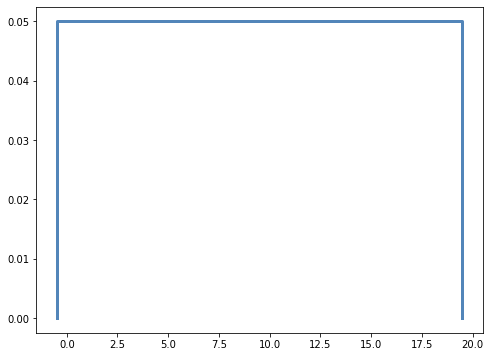

In [10]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)

thinkplot.Pmf(wait)

Get the probability distribution of `wait` in the more realistic case.

In [11]:
w5 = Wait(5)
w10 = Wait(10)

In [13]:
wait = thinkbayes2.Pmf()

wait.Set(w5, 0.5)
wait.Set(w10, 0.5)

wait.Normalize()

1.0

In [14]:
mix = thinkbayes2.MakeMixture(wait)

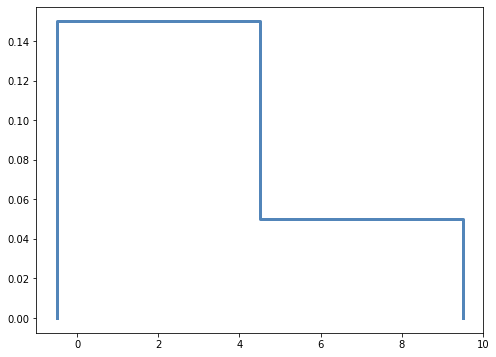

In [15]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)

thinkplot.Pmf(mix)